<a href="https://colab.research.google.com/github/pseudope/2021_F_Level2/blob/main/Sessions/20210924_Level2_Subword_Tokenizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **CH14. 서브워드 토크나이저 (Subword Tokenizer)**


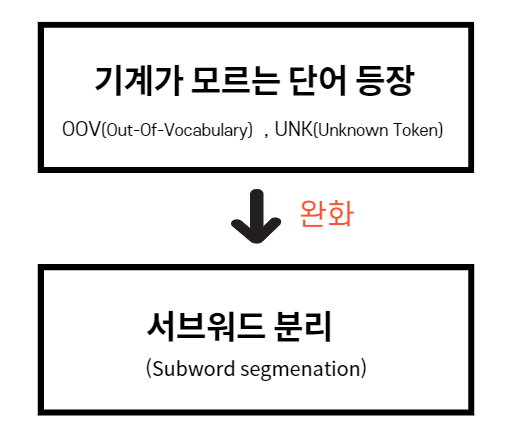






*   **하나**의 단어 → **여러 서브워드**로 분리
     - (Ex) birthplace = birth + place
*   **서브워드 토크나이저** : 이러한 작업 수행 토크나이저
    - 대표적으로 Sentencepiece,  Wordpiece







## **1) Byte Pair Encoding, BPE**



*  데이터 압축 알고리즘 → **자연어 처리 서브워드 분리 알고리즘**



#### (참고) 기존 BPE 작동 방법



*   연속적으로 **가장 많이 등장**한 글자의 쌍 → **하나의 글자**


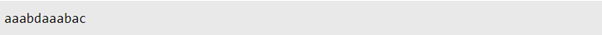

▼ 'aa' → 'Z' (하나의 바이트)

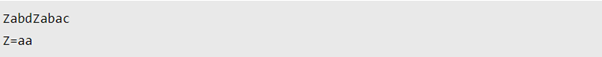

▼ 'ab' → 'Y' (하나의 바이트)

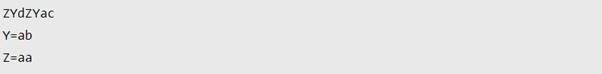

▼ [최종] 'ZY' → 'X' (하나의 바이트)

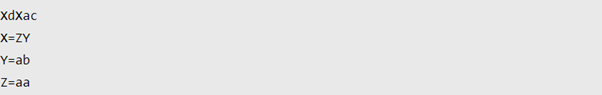

### **1-(1)자연어 처리에서의 BPE**
: 서브워드 분리 알고리즘

: 글자 (character) 단위 --> 단어 집합 (vocabulary) 





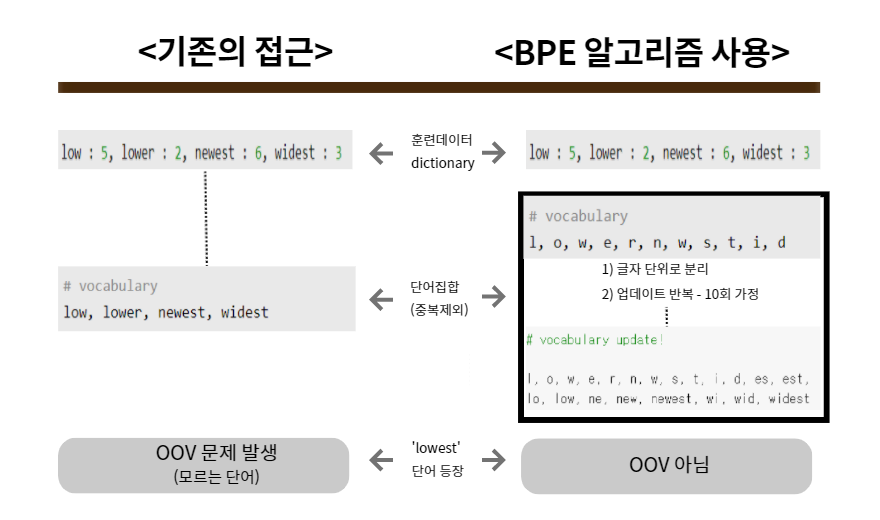

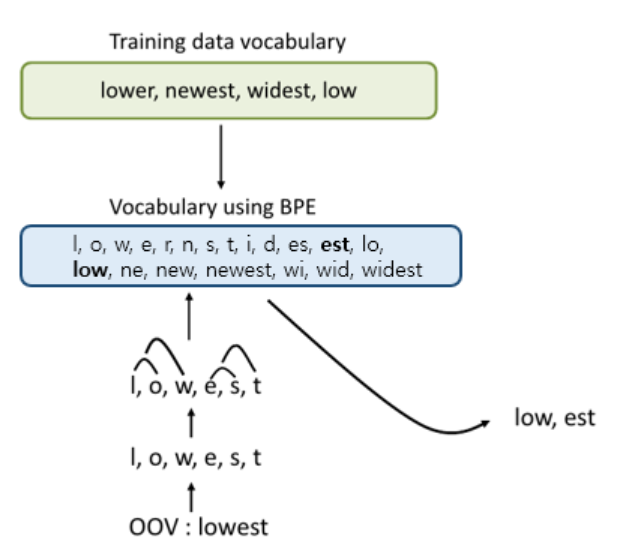

#### (참고) 업데이트 방법

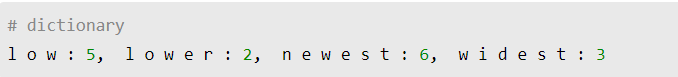

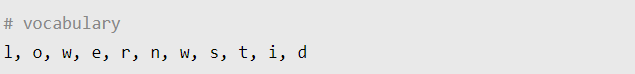



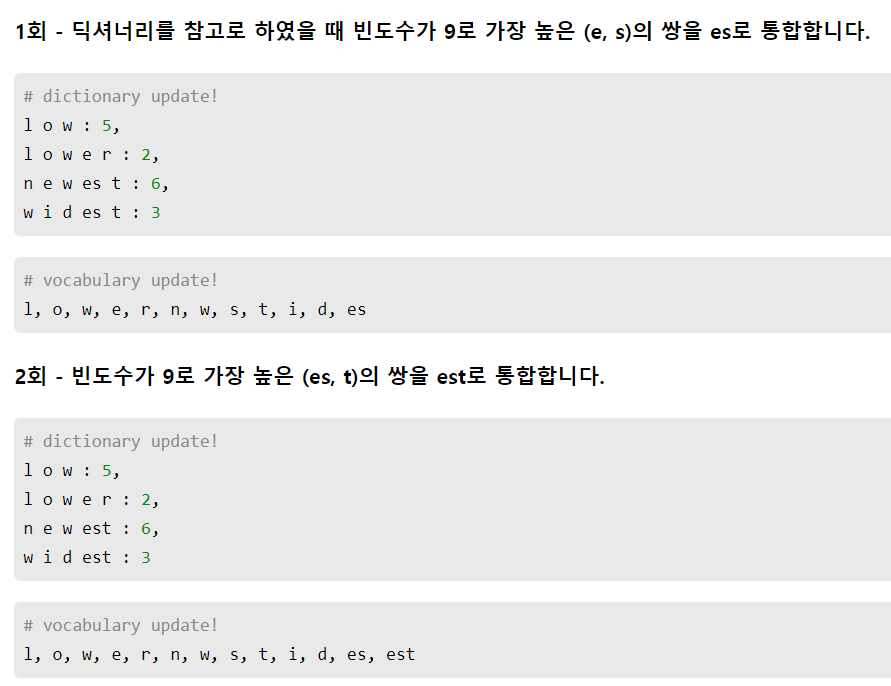

### **1-(2) 코드 실습**

In [ ]:
import re, collections 
from IPython.display import display, Markdown, Latex

<과정>



* Step 1.   corpus 내의 sentence들을 어절 단위로 토크나이징

* Stpe 2.   어절 token들을 **character 단위로 분리**(어절 token 내 띄어쓰기 처리) 및 딕셔너리 생성(최종 vocabulary를 만들기 위한 기준으로 사용). 이때 각 word의 끝에는 </w> 토큰을 붙여줍니다.

* Stpe 3.   **가장 많이 등장한 pair**를 찾아 merge한 후 딕셔너리를 업데이트 (ex. (e,s) --> es )

* Stpe 4.   Step 3을 사용자가 지정한 횟수만큼 반복

* Stpe 5.   완성된 딕셔너리를 띄어쓰기 단위로 모두 분리하여 unique token만 남은 vocabulary를 생성

* Stpe 6.   final vocab size = # of initial vocab size + # of merge operations

In [ ]:
#BPE 입력

dictionary = {'l o w </w>' : 5,
         'l o w e r </w>' : 2,
         'n e w e s t </w>':6,
         'w i d e s t </w>':3
         }

# BPE 10회 수행 가정 

num_merges = 10

In [ ]:
#BPE 코드

def get_stats(dictionary):
    # 유니그램의 pair들의 빈도수를 카운트
    pairs = collections.defaultdict(int)
    for word, freq in dictionary.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i],symbols[i+1]] += freq
    print('현재 pair들의 빈도수 :', dict(pairs))
    return pairs

#가장 자주 등장한 쌍을 merge(공백 제거)
def merge_dictionary(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

bpe_codes = {}
bpe_codes_reverse = {}

for i in range(num_merges):
    display(Markdown("### Iteration {}".format(i + 1)))
    pairs = get_stats(dictionary)
    best = max(pairs, key=pairs.get)
    dictionary = merge_dictionary(best, dictionary)

    bpe_codes[best] = i
    bpe_codes_reverse[best[0] + best[1]] = best

    print("new merge: {}".format(best))
    print("dictionary: {}".format(dictionary))
    print("bpe_codes: {}".format(bpe_codes))
    print("bpe_codes_reverse: {}".format(bpe_codes_reverse))

### Iteration 1

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 8, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('e', 's'): 9, ('s', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'e'): 3}
new merge: ('e', 's')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w es t </w>': 6, 'w i d es t </w>': 3}
bpe_codes: {('e', 's'): 0}
bpe_codes_reverse: {'es': ('e', 's')}


### Iteration 2

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'es'): 6, ('es', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'es'): 3}
new merge: ('es', 't')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est </w>': 6, 'w i d est </w>': 3}
bpe_codes: {('e', 's'): 0, ('es', 't'): 1}
bpe_codes_reverse: {'es': ('e', 's'), 'est': ('es', 't')}


### Iteration 3

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est'): 6, ('est', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est'): 3}
new merge: ('est', '</w>')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}
bpe_codes: {('e', 's'): 0, ('es', 't'): 1, ('est', '</w>'): 2}
bpe_codes_reverse: {'es': ('e', 's'), 'est': ('es', 't'), 'est</w>': ('est', '</w>')}


### Iteration 4

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('l', 'o')
dictionary: {'lo w </w>': 5, 'lo w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}
bpe_codes: {('e', 's'): 0, ('es', 't'): 1, ('est', '</w>'): 2, ('l', 'o'): 3}
bpe_codes_reverse: {'es': ('e', 's'), 'est': ('es', 't'), 'est</w>': ('est', '</w>'), 'lo': ('l', 'o')}


### Iteration 5

현재 pair들의 빈도수 : {('lo', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('lo', 'w')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}
bpe_codes: {('e', 's'): 0, ('es', 't'): 1, ('est', '</w>'): 2, ('l', 'o'): 3, ('lo', 'w'): 4}
bpe_codes_reverse: {'es': ('e', 's'), 'est': ('es', 't'), 'est</w>': ('est', '</w>'), 'lo': ('l', 'o'), 'low': ('lo', 'w')}


### Iteration 6

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('n', 'e')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'ne w est</w>': 6, 'w i d est</w>': 3}
bpe_codes: {('e', 's'): 0, ('es', 't'): 1, ('est', '</w>'): 2, ('l', 'o'): 3, ('lo', 'w'): 4, ('n', 'e'): 5}
bpe_codes_reverse: {'es': ('e', 's'), 'est': ('es', 't'), 'est</w>': ('est', '</w>'), 'lo': ('l', 'o'), 'low': ('lo', 'w'), 'ne': ('n', 'e')}


### Iteration 7

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('ne', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('ne', 'w')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'new est</w>': 6, 'w i d est</w>': 3}
bpe_codes: {('e', 's'): 0, ('es', 't'): 1, ('est', '</w>'): 2, ('l', 'o'): 3, ('lo', 'w'): 4, ('n', 'e'): 5, ('ne', 'w'): 6}
bpe_codes_reverse: {'es': ('e', 's'), 'est': ('es', 't'), 'est</w>': ('est', '</w>'), 'lo': ('l', 'o'), 'low': ('lo', 'w'), 'ne': ('n', 'e'), 'new': ('ne', 'w')}


### Iteration 8

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('new', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('new', 'est</w>')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'w i d est</w>': 3}
bpe_codes: {('e', 's'): 0, ('es', 't'): 1, ('est', '</w>'): 2, ('l', 'o'): 3, ('lo', 'w'): 4, ('n', 'e'): 5, ('ne', 'w'): 6, ('new', 'est</w>'): 7}
bpe_codes_reverse: {'es': ('e', 's'), 'est': ('es', 't'), 'est</w>': ('est', '</w>'), 'lo': ('l', 'o'), 'low': ('lo', 'w'), 'ne': ('n', 'e'), 'new': ('ne', 'w'), 'newest</w>': ('new', 'est</w>')}


### Iteration 9

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('low', '</w>')
dictionary: {'low</w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'w i d est</w>': 3}
bpe_codes: {('e', 's'): 0, ('es', 't'): 1, ('est', '</w>'): 2, ('l', 'o'): 3, ('lo', 'w'): 4, ('n', 'e'): 5, ('ne', 'w'): 6, ('new', 'est</w>'): 7, ('low', '</w>'): 8}
bpe_codes_reverse: {'es': ('e', 's'), 'est': ('es', 't'), 'est</w>': ('est', '</w>'), 'lo': ('l', 'o'), 'low': ('lo', 'w'), 'ne': ('n', 'e'), 'new': ('ne', 'w'), 'newest</w>': ('new', 'est</w>'), 'low</w>': ('low', '</w>')}


### Iteration 10

현재 pair들의 빈도수 : {('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('w', 'i')
dictionary: {'low</w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'wi d est</w>': 3}
bpe_codes: {('e', 's'): 0, ('es', 't'): 1, ('est', '</w>'): 2, ('l', 'o'): 3, ('lo', 'w'): 4, ('n', 'e'): 5, ('ne', 'w'): 6, ('new', 'est</w>'): 7, ('low', '</w>'): 8, ('w', 'i'): 9}
bpe_codes_reverse: {'es': ('e', 's'), 'est': ('es', 't'), 'est</w>': ('est', '</w>'), 'lo': ('l', 'o'), 'low': ('lo', 'w'), 'ne': ('n', 'e'), 'new': ('ne', 'w'), 'newest</w>': ('new', 'est</w>'), 'low</w>': ('low', '</w>'), 'wi': ('w', 'i')}


### **1-(3) OOV에 대처**

In [ ]:
def get_pairs(word):
    """Return set of symbol pairs in a word.
    Word is represented as a tuple of symbols (symbols being variable-length strings).
    """
    pairs = set()
    prev_char = word[0]
    for char in word[1:]:
        pairs.add((prev_char, char))
        prev_char = char

    return pairs


def encode(orig):
    """Encode word based on list of BPE merge operations, which are applied consecutively"""

    word = tuple(orig) + ('</w>',)
    display(Markdown("__word split into characters:__ <tt>{}</tt>".format(word)))

    pairs = get_pairs(word)

    if not pairs:
        return orig

    iteration = 0
    while True:
        iteration += 1
        display(Markdown("__Iteration {}:__".format(iteration)))

        print("bigrams in the word: {}".format(pairs))
        bigram = min(pairs, key = lambda pair: bpe_codes.get(pair, float('inf')))
        print("candidate for merging: {}".format(bigram))

        if bigram not in bpe_codes:
            display(Markdown("__Candidate not in BPE merges, algorithm stops.__"))
            break
            
        first, second = bigram
        new_word = []
        i = 0
        while i < len(word):
            try:
                j = word.index(first, i)
                new_word.extend(word[i:j])
                i = j
            except:
                new_word.extend(word[i:])
                break

            if word[i] == first and i < len(word)-1 and word[i+1] == second:
                new_word.append(first+second)
                i += 2
            else:
                new_word.append(word[i])
                i += 1
        new_word = tuple(new_word)
        word = new_word
        print("word after merging: {}".format(word))
        if len(word) == 1:
            break
        else:
            pairs = get_pairs(word)

    # 특별 토큰인 </w>는 출력하지 않는다.
    if word[-1] == '</w>':
        word = word[:-1]
    elif word[-1].endswith('</w>'):
        word = word[:-1] + (word[-1].replace('</w>',''),)

    return word

In [ ]:
encode("lowest")

__word split into characters:__ <tt>('l', 'o', 'w', 'e', 's', 't', '</w>')</tt>

__Iteration 1:__

bigrams in the word: {('t', '</w>'), ('e', 's'), ('s', 't'), ('w', 'e'), ('l', 'o'), ('o', 'w')}
candidate for merging: ('e', 's')
word after merging: ('l', 'o', 'w', 'es', 't', '</w>')


__Iteration 2:__

bigrams in the word: {('t', '</w>'), ('es', 't'), ('w', 'es'), ('l', 'o'), ('o', 'w')}
candidate for merging: ('es', 't')
word after merging: ('l', 'o', 'w', 'est', '</w>')


__Iteration 3:__

bigrams in the word: {('l', 'o'), ('o', 'w'), ('w', 'est'), ('est', '</w>')}
candidate for merging: ('est', '</w>')
word after merging: ('l', 'o', 'w', 'est</w>')


__Iteration 4:__

bigrams in the word: {('l', 'o'), ('w', 'est</w>'), ('o', 'w')}
candidate for merging: ('l', 'o')
word after merging: ('lo', 'w', 'est</w>')


__Iteration 5:__

bigrams in the word: {('lo', 'w'), ('w', 'est</w>')}
candidate for merging: ('lo', 'w')
word after merging: ('low', 'est</w>')


__Iteration 6:__

bigrams in the word: {('low', 'est</w>')}
candidate for merging: ('low', 'est</w>')


__Candidate not in BPE merges, algorithm stops.__

('low', 'est')

### (참고) 그 외 알고리즘 


*   Wordpiece Model    

               BPE 참고하여 만들어짐
               빈도수 → 코퍼스 우도(Likelihood) 가장 높이는 쌍
               논문 : https://static.googleusercontent.com/media/research.google.com/ko//pubs/archive/37842.pdf


*   Unigram Language Model Tokenizer
               각각의 서브워드들에 대해서 손실(loss) 계산
               논문 : https://arxiv.org/pdf/1804.10959.pdf



### **2) 센텐스피스 (SentencePiece)**



*   서브워드 토크나이징 알고리즘 내장 패키지
*   전처리 하지 않은 raw data에 바로 단어 분리 토큰화 수행


In [ ]:
pip install sentencepiece

     |████████████████████████████████| 1.2 MB 5.4 MB/s 


#### 2-(1) IMDB 리뷰 토큰화하기

In [ ]:
import sentencepiece as spm
import pandas as pd
import urllib.request
import csv

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

('IMDb_Reviews.csv', <http.client.HTTPMessage at 0x7f51a660dbd0>)

In [ ]:
train_df = pd.read_csv('IMDb_Reviews.csv')
train_df.head(5)

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0


In [ ]:
train_df['review']

0        My family and I normally do not watch local mo...
1        Believe it or not, this was at one time the wo...
2        After some internet surfing, I found the "Home...
3        One of the most unheralded great works of anim...
4        It was the Sixties, and anyone with long hair ...
                               ...                        
49995    the people who came up with this are SICK AND ...
49996    The script is so so laughable... this in turn,...
49997    "So there's this bride, you see, and she gets ...
49998    Your mind will not be satisfied by this nobud...
49999    The chaser's war on everything is a weekly sho...
Name: review, Length: 50000, dtype: object

In [ ]:
print('리뷰 개수 :',len(train_df)) # 리뷰 개수 출력

리뷰 개수 : 50000


In [ ]:
with open('imdb_review.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(train_df['review']))

In [ ]:
spm.SentencePieceTrainer.Train('--input=imdb_review.txt --model_prefix=imdb --vocab_size=5000 --model_type=bpe --max_sentence_length=9999')



*   input : 학습시킬 파일

*   model_prefix : 만들어질 모델 이름

*   vocab_size : 단어 집합의 크기
*   model_type : 사용할 모델 (unigram(default), bpe, char, word)




*   max_sentence_length: 문장의 최대 길이

(참고)

*   pad_id, pad_piece: pad token id, 값

*   unk_id, unk_piece: unknown token id, 값
*   bos_id, bos_piece: begin of sentence token id, 값


*   eos_id, eos_piece: end of sequence token id, 값


*   user_defined_symbols: 사용자 정의 토큰






In [ ]:
#vocab 파일에서 학습된 서브워드 확인

vocab_list = pd.read_csv('imdb.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list.sample(10)

,0,1
2481,▁cat,-2478
628,▁ra,-625
4551,▁Brown,-4548
874,though,-871
4749,anity,-4746
4593,▁lacking,-4590
1258,▁absolute,-1255
3805,▁information,-3802
1763,ences,-1760
2797,arrass,-2794


In [ ]:
len(vocab_list)

5000

In [ ]:


sp = spm.SentencePieceProcessor()
vocab_file = "imdb.model"
sp.load(vocab_file)

True


* 도구 테스트

     *  encode_as_pieces : 문장을 입력하면 서브 워드 시퀀스로 변환

     *  encode_as_ids : 문장을 입력하면 정수 시퀀스로 변환



In [ ]:
lines = [
  "I didn't at all think of it this way.",
  "I have waited a long time for someone to film"
]
for line in lines:
  print(line)
  print(sp.encode_as_pieces(line))
  print(sp.encode_as_ids(line))
  print()

I didn't at all think of it this way.
['▁I', '▁didn', "'", 't', '▁at', '▁all', '▁think', '▁of', '▁it', '▁this', '▁way', '.']
[41, 623, 4950, 4926, 138, 169, 378, 30, 58, 73, 413, 4945]

I have waited a long time for someone to film
['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film']
[41, 141, 1364, 1120, 4, 666, 285, 92, 1078, 33, 91]





*   GetPieceSize() : 단어 집합의 크기 확인



In [ ]:
sp.GetPieceSize()

5000

*   idToPiece : 정수로부터 맵핑되는 서브 워드로 변환

In [ ]:
sp.IdToPiece(430)

'▁character'

*   PieceToId : 서브워드로부터 맵핑되는 정수로 변환

In [ ]:
sp.PieceToId('▁character')

430

*  DecodeIds : 정수 시퀀스로부터 문장으로 변환

In [ ]:
sp.DecodeIds([41, 141, 1364, 1120, 4, 666, 285, 92, 1078, 33, 91])

'I have waited a long time for someone to film'

*  DecodePieces : 서브워드 시퀀스로부터 문장으로 변환

In [ ]:
sp.DecodePieces(['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film'])

'I have waited a long time for someone to film'

*   encode : 문장으로부터 인자값에 따라서 정수 시퀀스 또는 서브워드 시퀀스로 변환 가능

In [ ]:
print(sp.encode('I have waited a long time for someone to film', out_type=str))
print(sp.encode('I have waited a long time for someone to film', out_type=int))

['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film']
[41, 141, 1364, 1120, 4, 666, 285, 92, 1078, 33, 91]


## 3) 서브워드텍스트인코더 (SubwordTextEncoder)



*   텐서플로우 통해 사용 가능
*   Wordpiece Model 채택




### 3-(1) 네이버 영화 리뷰 토큰화하기

In [ ]:
import tensorflow_datasets as tfds
import urllib.request
import pandas as pd

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")

('ratings_train.txt', <http.client.HTTPMessage at 0x7f5152431fd0>)

In [ ]:
train_data = pd.read_table('ratings_train.txt')

In [ ]:
train_data.head(5)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
print(train_data.isnull().sum())

id          0
document    5
label       0
dtype: int64


In [ ]:
train_data = train_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    train_data['document'], target_vocab_size=2**13)

In [ ]:
print(tokenizer.subwords[:100])

['. ', '..', '영화', '이_', '...', '의_', '는_', '도_', '다', ', ', '을_', '고_', '은_', '가_', '에_', '.. ', '한_', '너무_', '정말_', '를_', '고', '게_', '영화_', '지', '... ', '진짜_', '이', '다_', '요', '만_', '? ', '과_', '나', '가', '서_', '지_', '로_', '으로_', '아', '어', '....', '음', '한', '수_', '와_', '도', '네', '그냥_', '나_', '더_', '왜_', '이런_', '면_', '기', '하고_', '보고_', '하는_', '서', '좀_', '리', '자', '스', '안', '! ', '에서_', '영화를_', '미', 'ㅋㅋ', '네요', '시', '주', '라', '는', '오', '없는_', '에', '해', '사', '!!', '영화는_', '마', '잘_', '수', '영화가_', '만', '본_', '로', '그_', '지만_', '대', '은', '비', '의', '일', '개', '있는_', '없다', '함', '구', '하']


In [ ]:
sample_string = train_data['document'][20]

print(sample_string)



나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님


In [ ]:
#정수 인코딩 예시
# 인코딩한 결과를 tokenized_string에 저장

tokenized_string = tokenizer.encode(sample_string)
print('정수 인코딩 후의 문장: {}'.format(tokenized_string))

정수 인코딩 후의 문장: [669, 4700, 17, 1749, 8, 96, 131, 1, 48, 2239, 4, 7466, 32, 1274, 2655, 7, 80, 749, 1254]


In [ ]:
# 디코딩  예시

original_string = tokenizer.decode(tokenized_string)
print ('기존 문장: {}'.format(original_string))

print('\n')

#각 단어와 맵핑된 정수 확인 

for ts in tokenized_string :
    print('{} ----> {}'.format(ts, tokenizer.decode([ts])))

기존 문장: 나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님


669 ----> 나름 
4700 ----> 심오
17 ----> 한 
1749 ----> 뜻
8 ----> 도 
96 ----> 있는 
131 ----> 듯
1 ----> . 
48 ----> 그냥 
2239 ----> 학생
4 ----> 이 
7466 ----> 선생
32 ----> 과 
1274 ----> 놀
2655 ----> 아나
7 ----> 는 
80 ----> 영화는 
749 ----> 절대 
1254 ----> 아님


In [ ]:
sample_string = '이 영화 굉장히 재밌다 킄핫핫'

# 인코딩한 결과를 tokenized_string에 저장
tokenized_string = tokenizer.encode(sample_string)
print ('정수 인코딩 후의 문장 {}'.format(tokenized_string))

# 이를 다시 디코딩
original_string = tokenizer.decode(tokenized_string)
print ('기존 문장: {}'.format(original_string))



정수 인코딩 후의 문장 [4, 23, 1364, 2157, 8235, 8128, 8130, 8235, 8147, 8169, 8235, 8147, 8169]
기존 문장: 이 영화 굉장히 재밌다 킄핫핫


In [ ]:
for ts in tokenized_string:
  print ('{} ----> {}'.format(ts, tokenizer.decode([ts])))

4 ----> 이 
23 ----> 영화 
1364 ----> 굉장히 
2157 ----> 재밌다 
8235 ----> �
8128 ----> �
8130 ----> �
8235 ----> �
8147 ----> �
8169 ----> �
8235 ----> �
8147 ----> �
8169 ----> �
